In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from copy import deepcopy

from build_solver import build_erg_time_opt_solver
import pickle as pkl

In [2]:
# erg_ubs = [0.005, 0.008, 0.01, 0.02, 0.05, 0.08, 0.1, 0.12, 0.15, 0.2]
erg_ubs = [0.005, 0.01, 0.02,0.05, 0.08, 0.1]

# erg_ubs = np.linspace(0.001, 0.2, num=20)
erg_ubs = erg_ubs[::-1]
log = {
    'time' : [],
    'erg_ub' : [],
    'sols' : []
}

args = {
    'N' : 200, 
    'x0' : np.array([0.1, 0.1, 0., 0.]),
    'xf' : np.array([0.9, 0.9, 0., 0.]),
    'erg_ub' : 0.2,
    # 'alpha' : 0.8,
}

x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
u = np.zeros((args['N'], 2))
init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}

solver = build_erg_time_opt_solver(init_sol, args)

for i, erg_ub in enumerate(erg_ubs):
    args.update({
        'erg_ub' : erg_ub,
        # 'alpha' : 0.8,
    })
    # solver.reset()
    # solver = build_erg_time_opt_solver(init_sol, args)
    solver.solve(args=args, max_iter=10000, eps=1e-8)
    sol = solver.get_solution()
    init_sol = deepcopy(sol)
    log['time'].append(np.array(sol['tf']))
    log['erg_ub'].append(erg_ub)
    log['sols'].append(sol)
    print(sol['tf'], erg_ub)
    # plt.figure(i)
    # plt.plot(sol['x'][:,0], sol['x'][:,1],'g.')
    # plt.plot(sol['x'][:,0], sol['x'][:,1])
    

# plt.show()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


done in  5220  iterations
5.007921 0.1
5.015943 0.08
5.73927 0.05
6.969608 0.02
8.449434 0.01
10.482965 0.005


3754.0526654359605 5.007921 5.007921
5622.073400103335 5.015943 5.015943
5192.297784951 5.73927 5.73927
5710.507817730131 6.969608 6.969608
2887.7672978193596 8.449434 8.449434
1831.5428068629842 10.482965 10.482965


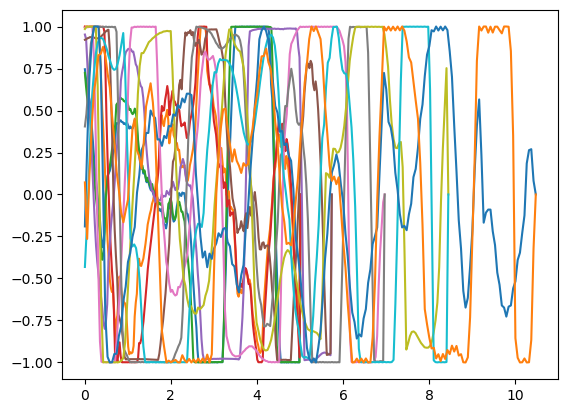

In [3]:
ctrl_sat = []
for _tf, _sol in zip(log['time'],log['sols']):
    print(np.sum(np.abs(_sol['u'])>0.95) * args['N']/_tf, _tf, _sol['tf'])
    dt = args['N']/_sol['tf']
    ctrl_sat.append(
        np.sum(np.square(_sol['u']) * dt ) / _sol['tf']
        # np.sum(np.abs(_sol['u'])>0.95) * args['N']/_sol['tf']
    )
    plt.plot(np.linspace(0,_tf, args['N']),_sol['u'])

In [4]:
log['erg_ub']

[0.1, 0.08, 0.05, 0.02, 0.01, 0.005]

In [5]:
ctrl_sat

[Array(1220.3059, dtype=float32),
 Array(1521.4907, dtype=float32),
 Array(1383.8116, dtype=float32),
 Array(1165.5447, dtype=float32),
 Array(655.39276, dtype=float32),
 Array(311.6995, dtype=float32)]

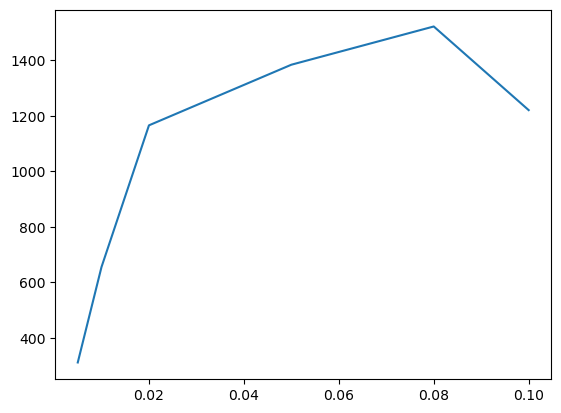

In [6]:
plt.plot(log['erg_ub'], ctrl_sat)

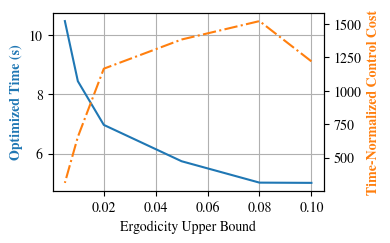

In [30]:
plt.rcParams["font.family"] = "freeserif"

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, ax1 = plt.subplots(figsize=(4,2.5))


ax1.plot(log['erg_ub'], log['time'], color=colors[0])
# plt.plot(log['time'], ctrl_sat)
ax1.set_xlabel('Ergodicity Upper Bound', fontname='freeserif')
ax1.set_ylabel('Optimized Time (s)', color=colors[0], fontname='freeserif', weight='bold')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(log['erg_ub'], ctrl_sat, color=colors[1], linestyle='-.')
ax2.set_ylabel('Time-Normalized Control Cost', color=colors[1], fontname='freeserif', weight='bold')
plt.tight_layout()
plt.savefig('opt-results.svg')
# plt.show()

In [9]:
log['erg_ub']

[0.1, 0.075, 0.05, 0.02, 0.01, 0.005]

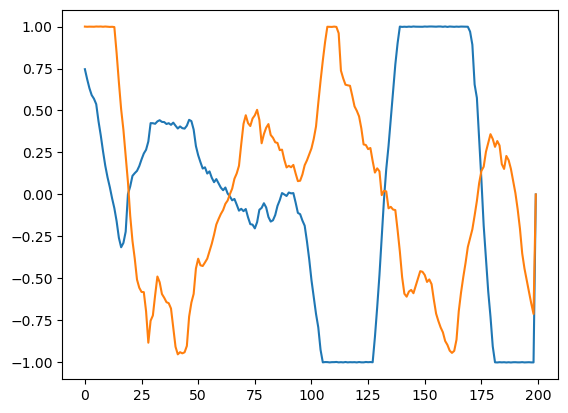

In [45]:
plt.plot(log['sols'][0]['u'])

In [11]:
np.sum(np.square(log['sols'][0]['u'])) * args['N'] / log['sols'][0]['tf']

Array(4487.441, dtype=float32)

In [12]:
erg_ubs[0]

0.1

In [13]:
log['sols'][0]['tf']

Array(3.854123, dtype=float32, weak_type=True)

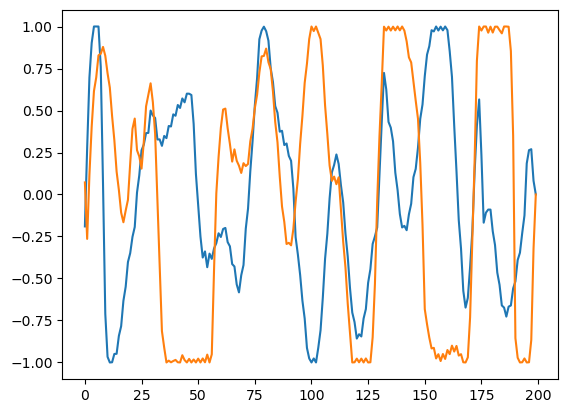

In [46]:
plt.plot(log['sols'][-1]['u'])

In [87]:
np.sum(np.square(log['sols'][-1]['u'])) * args['N'] / log['sols'][-1]['tf']

Array(898.4828, dtype=float32)